In [27]:
from __future__ import division
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Coding a forward shooting algorithm with a discrete Neoclassical growth model

## 1. The Problem

A discrete version of the two differencial equations:

$$ k_{t+1} = k_t^\alpha - (\delta + n + g)k_t - c_t + k_t$$
$$ c_{t+1} = \frac{\alpha k_{t+1}^{(\alpha-1)} - (\delta + \rho + g\epsilon)}{\epsilon}c_t + c_t$$

In [28]:
# Parameters
epsilon = 1.0
rho = 0.03
delta = 0.06
n = 0.01
g = 0.02
alpha = 1.0/3.0

> Exercise 1:

In [29]:
def kstar():
    return (alpha/(delta+rho+epsilon*g))**(1.0/(1.0-alpha))

def cstar(kss):
    return kss**alpha - (delta + n + g)*kss

kss = kstar()
css = cstar(kss)

In [30]:
def capital_accumulation_eqn(kt,ct):
    ktplus1 = kt**(alpha) - (delta + n + g)*kt - ct + kt
    return ktplus1

In [31]:
def discrete_euler(ktplus1,ct):
    ctplus1 = (1.0/epsilon)*(alpha*ktplus1**(alpha-1.0) - (delta + rho + g*epsilon))*ct + ct
    return ctplus1

In [32]:
k0 = kss*0.5

In [33]:
k_star, c_star = kstar(), cstar(kss)
print k_star, c_star

5.27508048351 1.26601931604


In [34]:
def compute_sample_path(k0,c0, T):
    k = np.empty((T+1,1))
    c = np.empty((T+1,1))
    k[0] = k0
    c[0] = c0
    for t in range(0,T):
        k[t+1] = capital_accumulation_eqn(k[t],c[t])
        c[t+1] = discrete_euler(k[t+1],c[t])
    sample_path = np.hstack([k,c])
    return sample_path

In [37]:
def forward_shoot(k0, tol=1e-07, verbose=False):
    # compute steady state values
    k_star, c_star = kstar(), cstar(kss)
    if k0 <= k_star:
        c_l = 0
        c_h = c_star
    else:
        c_l = c_star
        c_h = k0**alpha
    c0 = (c_h + c_l) / 2
    k, c = k0, c0
    
    # Initialize a counter
    count  = 0
    n_iter = 0
        
    # Forward Shooting Algorithm
    while 1:
    #for i in range(1):
        n_iter +=1
        k = capital_accumulation_eqn(k,c)
        c = discrete_euler(k,c)
        dist = np.abs(((k - k_star)**2 + (c - c_star)**2)**0.5)
        if verbose and n_iter%100==0:
            print dist
        count = count + 1
        if k0 <= k_star:
            if k > k_star:
                if dist < tol:
                    break
                else: # initial c_l too low!
                    c_l = c0
                    c0 = (c_h + c_l) / 2
                    k, c = k0, c0
                    count = 0
            if c > c_star:
                if dist < tol:
                    break
                else: # initial c_h too high!
                    c_h = c0 
                    c0 = (c_h + c_l) / 2
                    k, c = k0, c0
                    count = 0
        else:
            if k < k_star:
                if dist < tol:
                    break
                else: # initial c_l too high!
                    c_h = c0 
                    c0 = (c_h + c_l) / 2
                    k, c = k0, c0
                    count = 0
            if c < c_star:
                if dist < tol:
                    break
                else: # initial c_l too low!
                    c_l = c0
                    c0 = (c_h + c_l) / 2
                    k, c = k0, c0
                    count = 0
                
    sample_path = compute_sample_path(k0,c0,count)
    return sample_path

In [40]:
sample_path = forward_shoot(k0, tol=1e-07, verbose= False)

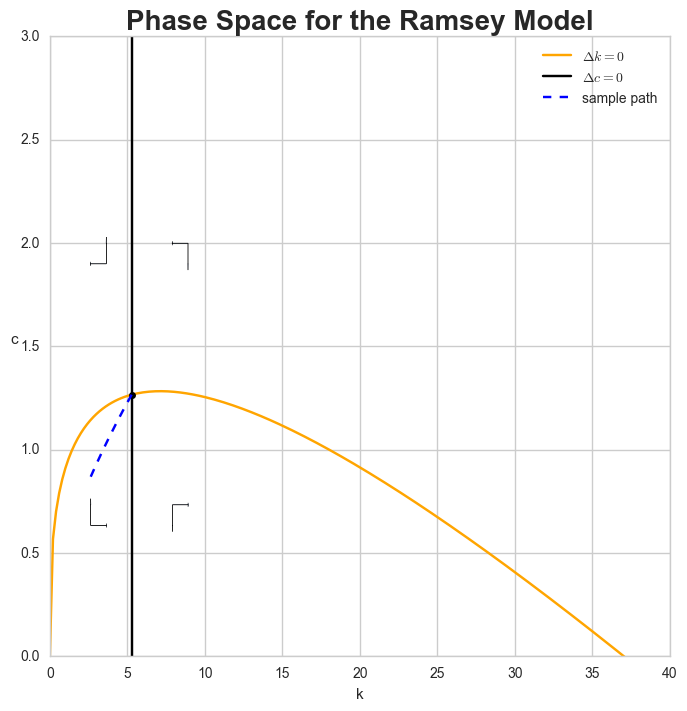

In [41]:
# Create a grid of points for plotting
gridmax, gridsize = 200, 1000
grid = np.linspace(0, gridmax, gridsize)

# Create a new figure
plt.figure(figsize=(8,8))

# Add the c and k locii
plt.plot(grid, cstar(grid), '-', color='orange', label=r'$\Delta k=0$')
plt.axvline(kss, color='black', label=r'$\Delta c=0$')
plt.plot(kss, css, marker='.', markersize=10, color='k')

# Add arrows to indicate out of steady-state dynamics
x_len = 1 
y_len = 0.1   

plt.arrow(x=0.5 * kss, y=0.5 * css, dx=0, dy=y_len)
plt.arrow(x=0.5 * kss, y=0.5 * css, dx=x_len, dy=0)

plt.arrow(x=0.5 * kss + x_len, y=1.5 * css, dx=0, dy=y_len)
plt.arrow(x=0.5 * kss + x_len, y=1.5 * css, dx=-x_len, dy=0)

plt.arrow(x=1.5 * kss, y=0.5 * css + y_len, dx=0, dy=-y_len)
plt.arrow(x=1.5 * kss, y=0.5 * css + y_len, dx=x_len, dy=0)

plt.arrow(x=1.5 * kss + x_len, y=1.5 * css + y_len, dx=0, dy=-y_len)
plt.arrow(x=1.5 * kss + x_len, y=1.5 * css + y_len, dx=-x_len, dy=0)

# Add the sample path
plt.plot(sample_path[:,0],sample_path[:,1], 'b--', label='sample path')

# Add the initial level of capital per worker
#plt.axvline(k0, color='k', ls='--', label=r'$k_{0}$')

# Don't forget to label your axes!
plt.xlabel('k')
plt.ylim(0, 3)
plt.xlim(0,40)
plt.ylabel('c', rotation='horizontal')

# Add a title to the plot
plt.title('Phase Space for the Ramsey Model', fontsize=20, weight='bold')

# Add the legend
plt.legend(frameon=False)

plt.show()